# Đồ Án Cuối Kỳ: Phân tích dữ liệu phim (TMDb)

Mỗi năm có hàng nghìn bộ phim được ra mắt nhưng chỉ một phần trăm trong số đó thành công. Mục đích của công việc này là phân tích các yếu tố quyết định ảnh hưởng đến lợi nhuận của bộ phim và thành công thương mại. Bài viết có cấu trúc như sau. Phần đầu tiên sẽ tập trung vào việc điều tra các vấn đề trong tập dữ liệu và sắp xếp dữ liệu thành một định dạng để tôi phân tích dễ dàng hơn. Phần thứ hai phân tích tập dữ liệu đã được làm sạch và trình bày kết quả phân tích thống kê của tôi.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc file CSV

In [65]:
path="data.csv"
df=pd.read_csv(path)

### Trực quan hóa dữ liệu


 *Đọc 5 dòng đầu của tập dữ liệu*

In [66]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Bộ dữ liệu phim này cung cấp nhiều thông số khác nhau cho từng phim, bao gồm kinh phí và doanh thu, thời lượng phát sóng, danh sách thể loại phim, mức độ phổ biến và số phiếu bầu trung bình/số phiếu bầu, ngày phát hành, năm phát hành, v.v.


*Số hàng và số cột*

In [67]:
df.shape

(10866, 21)

Tổng cộng có 10866 phim và 21 cột trong tập dữ liệu.

*Kiểu dữ liệu của các cột*

In [68]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

*Tóm tắt của khung dữ liệu*

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Dựa trên những quan sát ban đầu của tôi, tôi đã kết luận:
<ul>
    <li>Các cột 'id', 'imdb_id' cung cấp cho chúng ta thông tin tương tự, vì vậy tôi sẽ xóa cột 'imdb_id' khỏi khung dữ liệu.</li>
    <li>Các cột 'popularity', 'runtime', 'vote_average', 'vote_count', 'original_title', 'cast', 'director', 'Production companies', 'release_date' và 'release_year' hữu ích cho phân tích của tôi.</li>
    <li>Các cột 'budget_adj' và 'revenue_adj' hiển thị ngân sách và doanh thu của bộ phim liên quan theo đô la năm 2010, tính đến lạm phát theo thời gian. Chúng hữu ích hơn các biến không được điều chỉnh. Vì vậy, tôi sẽ loại bỏ các biến không được điều chỉnh.</li>
    <li>Các cột 'homepage', 'tagline', 'keywords', 'overview' không hữu ích cho phân tích của tôi, vì vậy các cột này sẽ bị xóa khỏi khung dữ liệu trong phần làm sạch dữ liệu tiếp theo.</li>
</ul>


*Những giá trị bị thiếu trong tập dữ liệu*

In [70]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [71]:
# Đếm số lượng hàng có ít nhất 1 giá trị NaN
df.isna().any(axis=1).sum()

np.int64(8874)

Đây là một số lượng lớn các giá trị null trong tập dữ liệu cho các cột 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres' và 'production_companies'. Vì một số trong số chúng không hữu ích cho phân tích của tôi, tôi sẽ loại bỏ chúng trong phần làm sạch dữ liệu.

*Thống kê mô tả*


In [72]:
# In số liệu thống kê mô tả cho từng cột dữ liệu
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Như bảng hiển thị ở trên cho thấy, 50% giá trị trong budget_adj và revenue_adj là giá trị bằng không. Bên cạnh đó, giá trị tối thiểu của runtime là 0, nghĩa là có thể có một số giá trị bằng không trong thời gian chạy.

Để xác thực những phát hiện này, tôi sẽ đếm tổng số hàng trong mỗi cột có chứa giá trị null.

*Số lượng giá trị bằng không*

In [73]:
# Đếm tổng số hàng trong mỗi cột có chứa giá trị null
df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

Theo kết quả trên , có 31 hàng giá trị bằng 0 trong "runtime", 5696 hàng có giá trị bằng 0 trong "budget_adj" và  6016 hàng giá trị bằng 0 trong "revenue_adj".

Do đó, có một lượng lớn dữ liệu bị thiếu đối với budget_adj và revenue_adj.Trong trường hợp này, việc loại bỏ các hàng dữ liệu bị thiếu là lựa chọn tốt nhất.

Nếu chỉ có một vài hàng thì việc điền giá trị trung bình vào sẽ là một ý tưởng hay, nhưng sử dụng kỹ thuật này trong tình huống này sẽ tạo ra một phân tích bị lệch.

Vì vậy, tốt hơn là có ít dữ liệu với thông tin chính xác hơn là dữ liệu lớn với kết quả bị lệch 

*Các dữ liệu bị trùng lập trong tập dữ liệu*

In [74]:
# Số dữ liệu bị trùng lập
sum(df.duplicated())

1

In [75]:
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Chỉ có một hàng bị trùng lập dữ liệu.Tôi sẽ loại bỏ nó trong phần làm sạch dữ liệu.

*Số lượng giá trị duy nhất trong tập dữ liệu*


In [76]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

## Làm sạch dữ liệu (Xử lý các giá trị bị thiếu và dữ liệu và dữ liệu trùng lặp: Xóa thông tin không sửu dụng)

Trong phần này, tôi sẽ cố gắng xử lý vấn đề về giá trị bị thiếu, dữ liệu trùng lặp và định dạng
<ul>
    <li>Xóa các hàng trùng lặp khỏi tập dữ liệu.</li>
    <li>Xóa các cột không sử dụng không hữu ích trong phân tích của tôi</li>
    <li>Xóa các phim có giá trị bằng không của các cột budget, revenue and runtim</li>
    <li>Thay đổi định dạng "release date" thành định dạng datatime và định dạng "budget_adj" và "revence_adj" từ float sang int</li>
</ul>

*Xóa các bảng sao trùng lặp*

In [77]:
# Thay đổi trực tiếp trên DF không tạo ra bản sao khác
df.drop_duplicates(inplace=True)

In [78]:
# Kiểm tra xem số lượng bản sao trùng lặp 
sum(df.duplicated())

0

*Xóa những cột không sử dụng*


In [79]:
df.drop(['imdb_id','homepage','overview','tagline', 'keywords', 'budget','revenue'], axis=1, inplace=True)

In [80]:
# Xác nhận lại dữ liệu 
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


*Xóa những dòng có giá trị null*


In [81]:
df.dropna(inplace=True)

In [82]:
# Kiểm tra xem có bất kỳ cột nào có giá trị null không
df.isna().sum().any()

np.False_

*Xóa những dòng có có giá trị bằng 0*

In [83]:
df=df[(df!=0).all(axis=1)]

In [84]:
# Kiểm tra xem có bất kỳ cột nào có giá trị bằng 0 không
df.isin([0]).sum().any()

np.False_

*Thay đổi định dạng kiểu dữ liệu*

In [85]:
# Chuyển cột "release_data" sang kiểu dữ liệu datatime
df.loc[:,'release_date']=pd.to_datetime(df['release_date'])

df['release_date'].head()

C:\Users\namth\AppData\Local\Temp\ipykernel_13292\137034086.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:,'release_date']=pd.to_datetime(df['release_date'])


0    2015-06-09 00:00:00
1    2015-05-13 00:00:00
2    2015-03-18 00:00:00
3    2015-12-15 00:00:00
4    2015-04-01 00:00:00
Name: release_date, dtype: object

In [86]:
# Kiểm tra lại thông tin 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3805 non-null   int64  
 1   popularity            3805 non-null   float64
 2   original_title        3805 non-null   object 
 3   cast                  3805 non-null   object 
 4   director              3805 non-null   object 
 5   runtime               3805 non-null   int64  
 6   genres                3805 non-null   object 
 7   production_companies  3805 non-null   object 
 8   release_date          3805 non-null   object 
 9   vote_count            3805 non-null   int64  
 10  vote_average          3805 non-null   float64
 11  release_year          3805 non-null   int64  
 12  budget_adj            3805 non-null   float64
 13  revenue_adj           3805 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 445.9+ KB


In [87]:
# Số bộ phim còn lại sau khi làm sạch dữ liệu
row,col=df.shape
print(f'Sau khi làm sạch, số lượng phim còn lại là: {row}')

Sau khi làm sạch, số lượng phim còn lại là: 3805


In [88]:
# Lưu dữ liệu sang sau khi làm sạch sang file mới
df.to_csv('clean_data.csv',index=False)

# Phân tích dữ liệu thăm dò

Bây giờ dữ liệu đã được làm sạch , chúng ta sẽ bắt đầu vào việc phân tích tập dữ liệu bằng cách trả lời các câu hỏi đặt ra

### Top 10 bộ phim được phân tích và sắp xếp theo các tính năng (lợi nhuận, ngân sách, doanh thu, độ nổi tiếng, phiếu bầu)

In [ ]:
#Top Movies based on different features
Top_doanhthu = df[["original_title", "revenue_adj"]]
Top_ngansach = df[['original_title','budget_adj']]
Top_noitieng = df[['original_title','popularity']]
# top_loinhuan=df[['original_title','profit']]

#### Top 10 bộ phim hàng đầu dựa vài doanh thu

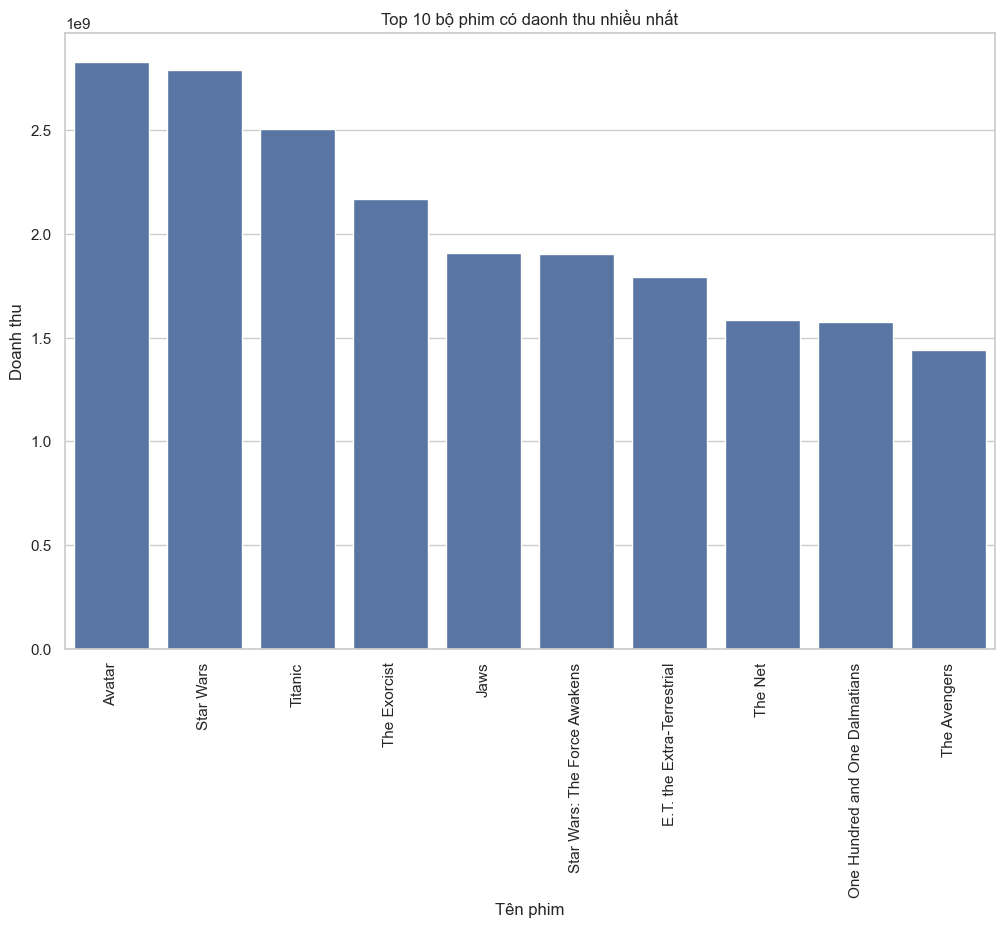

In [90]:
sns.set(rc={'figure.figsize':(12,8)},style='whitegrid')
# khởi tạo biểu đồ, với kich thước 12x8 inch, màu nền là whitegrid
ax = sns.barplot(
    x=Top_doanhthu.sort_values(by = "revenue_adj", ascending=False).head(10).original_title, 
    y=Top_doanhthu.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)
# chọn 10 phim có daonh thu cao nhất sau khi sắp xếp giảm dần
plt.xticks(rotation = 90)
# xoay các  nhãn 90 độ để không bị trùng lên nhau
ax.set(xlabel='Tên phim', ylabel='Doanh thu', title = 'Top 10 bộ phim có daonh thu nhiều nhất')
plt.show()

#### Top 10 bộ phim đắt nhất 

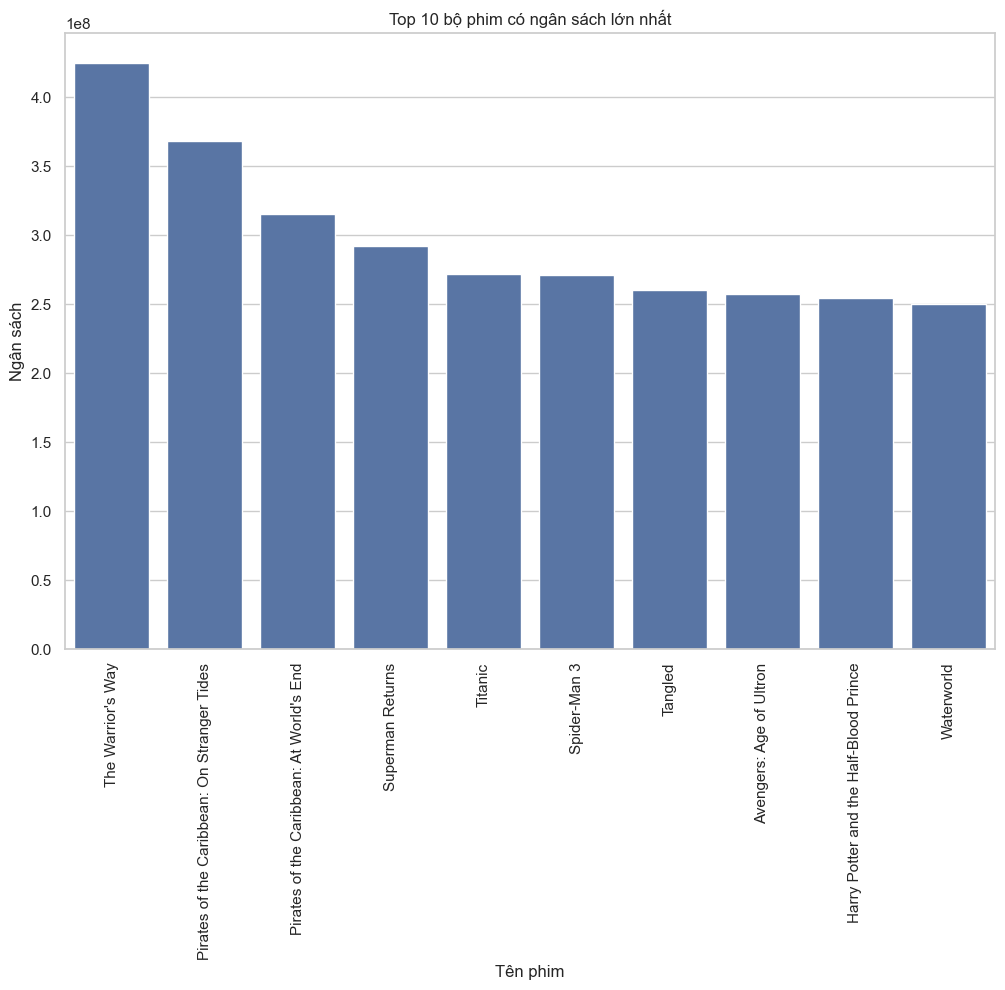

In [91]:
sns.set(rc={'figure.figsize':(12,8)},style='whitegrid')
ax=sns.barplot(
    x=Top_ngansach.sort_values(by='budget_adj',ascending=False).head(10).original_title, 
    y=Top_ngansach.sort_values(by="budget_adj",ascending=False).head(10).budget_adj)
plt.xticks(rotation=90)
ax.set(xlabel='Tên phim',ylabel='Ngân sách',title='Top 10 bộ phim có ngân sách lớn nhất')
plt.show()

#### Top 10 bộ phim nổi tiếng nhất

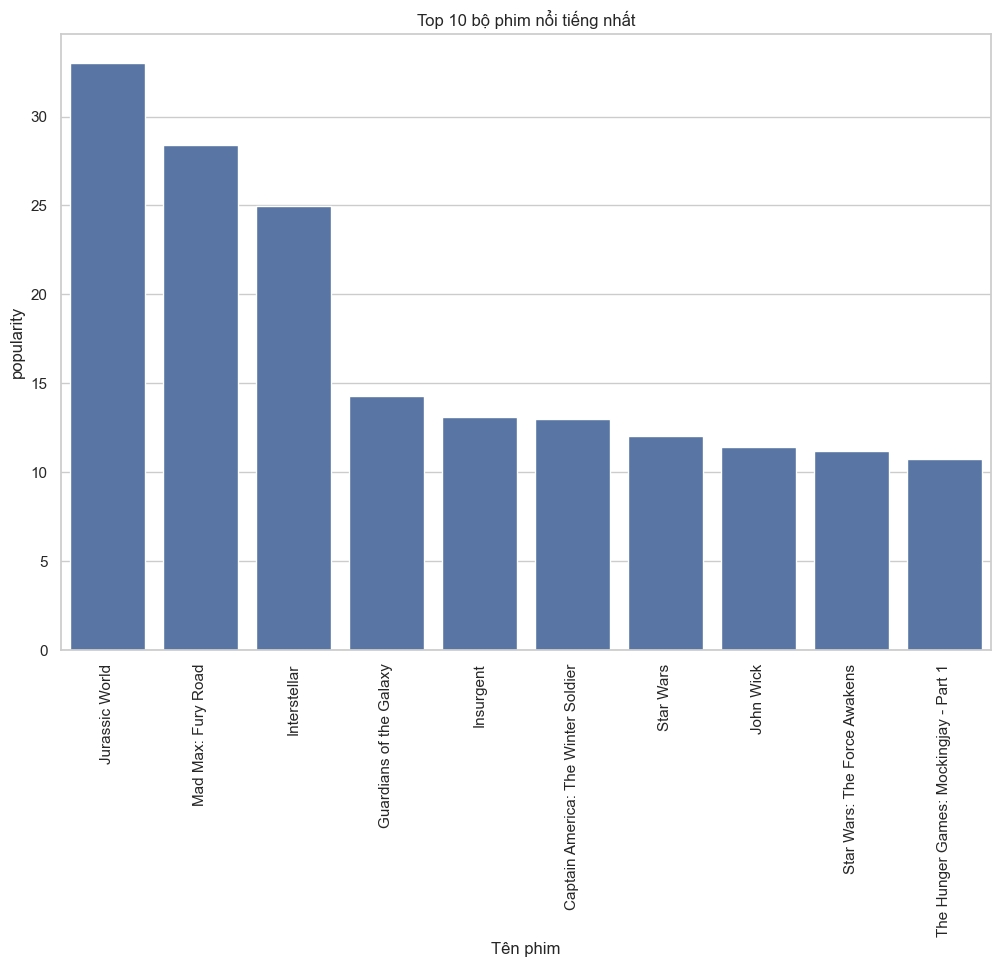

In [92]:
sns.set(rc={'figure.figsize':(12,8)},style='whitegrid')
ax=sns.barplot(
    x=Top_noitieng.sort_values(by='popularity',ascending=False).head(10).original_title, 
    y=Top_noitieng.sort_values(by="popularity",ascending=False).head(10).popularity)
plt.xticks(rotation=90)
ax.set(xlabel='Tên phim',title='Top 10 bộ phim nổi tiếng nhất')
plt.show()